In [209]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import random

In [210]:
#Pre-processing
csvData  = pd.read_csv("Datasets-Question1/dataset2/Train2.csv")
trainData = np.array(csvData)

if len(trainData) != 0 :
    trainDataLength = len(trainData)
else :
    exit()
    
bias = 1
numOfParameters = len(trainData[0]) 
weightVector =random.sample(range(1,11),numOfParameters ) 
trainVector = trainData[:trainDataLength , 0:(numOfParameters-1)] 
lossVector = []
errVector = []
accVector = []
count = 0
#Perceptron Algorithm 
print(weightVector)
for i in range(1,201) :
    count = 0
    for j in range(trainDataLength) :
        
        x = [bias] + list(trainVector[j])
        res= [i1*j1 for (i1,j1) in zip(x,weightVector)] #vector sum
        
        if (sum(res) < 0 and trainData[j][numOfParameters-1] == 1) :
            weightVector = [i1+j1 for (i1,j1) in zip(weightVector,x)]
            count = count + 1
    
        elif (sum(res) >= 0 and trainData[j][numOfParameters-1] == 0): 
            weightVector = [i1-j1 for (i1,j1) in zip(weightVector,x)]
            count = count + 1
    lossVector.append(count)
    errVector.append((count/trainDataLength)*100)
    accVector.append(((trainDataLength-count)/trainDataLength)*100)
    
                   
print(weightVector)

[9, 5, 8]
[-16, 1.8087409978308178, -0.2942585809701015]


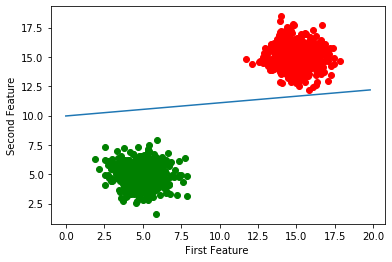

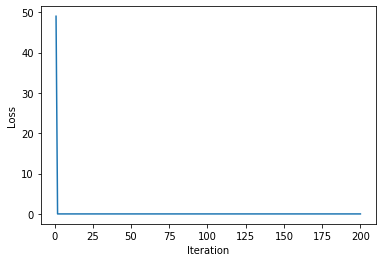

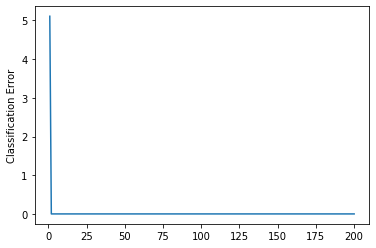

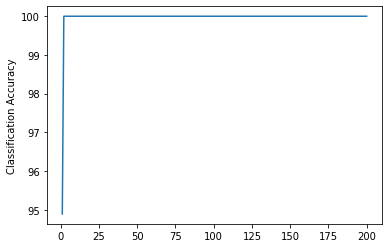

In [206]:
#Plotting the graph      

plt.ylabel('Second Feature')
plt.xlabel('First Feature ')

posxPoints = [ trainVector[i][0] for i in range(trainDataLength) if (trainData[i][numOfParameters-1]==1)]
posyPoints = [ trainVector[i][1] for i in range(trainDataLength) if (trainData[i][numOfParameters-1]==1)]

plt.plot(posxPoints,posyPoints,'ro')

negxPoints = [ trainVector[i][0] for i in range(trainDataLength) if (trainData[i][numOfParameters-1]==0)]
negyPoints = [ trainVector[i][1] for i in range(trainDataLength) if (trainData[i][numOfParameters-1]==0)]

plt.plot(negxPoints,negyPoints,'go')
x1=list(np.arange(0,20,0.3)) 
y1=[ -(weightVector[1]*i + weightVector[0])/(weightVector[2]) for i in x1 ]
plt.plot(x1,y1)


#training data 

x1 = [ i for i in range(1,201) ]

#loss
plt.figure(2)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.plot(x1,lossVector)

#Classification Error
plt.figure(3)
plt.ylabel('Classification Error')
plt.plot(x1,errVector)

#Classification Accuracy
plt.figure(4)
plt.ylabel('Classification Accuracy')
plt.plot(x1,accVector)



In [211]:
# training Data and Test Date
csvData1  = pd.read_csv("Datasets-Question1/dataset2/Test2.csv")
testData = np.array(csvData1)
testDataLength = len(testData)
testVector = testData[:testDataLength , 0:(numOfParameters-1)]
truePositive = 0 
falsePositive = 0
trueNegative = 0
falseNegative = 0
count1=0
count=0
for i in range(testDataLength) :
    x = [bias] + list(testVector[i])
    res= [i1*j1 for (i1,j1) in zip(x,weightVector)]
    res=sum(res)
    if( res >= 0 and testData[i][2] == 1) :
        truePositive= truePositive + 1
        count=count+1
    elif (res < 0 and testData[i][2] == 1) :
        falsePositive= falsePositive + 1
    elif (res >= 0 and testData[i][2] == 0) :
        trueNegative = trueNegative + 1 
    else :
        falseeNegative = falseNegative + 1
        count = count + 1
        
    
for i in range(trainDataLength) :
    x = [bias] + list(trainVector[i])
    res= [i1*j1 for (i1,j1) in zip(x,weightVector)]
    res=sum(res)
    if( res >= 0 and trainData[i][2] == 1) :
        truePositive= truePositive + 1
        count = count + 1
    elif (res < 0 and trainData[i][2] == 1) :
        falsePositive= falsePositive + 1
    elif (res >= 0 and trainData[i][2] == 0) :
        trueNegative = trueNegative + 1 
    else :
        falseNegative = falseNegative + 1
        count = count + 1

print('True Positive')
print(truePositive)
print('False Positve')
print(falsePositive)
print('True Negative')
print(trueNegative)
print('False Negative')
print(falseNegative)
print("Classification Accuracy")
print(count/(testDataLength+trainDataLength) * 100)




True Positive
600
False Positve
0
True Negative
0
False Negative
481
Classification Accuracy
100.0


# classification

dataset 1 - linearly seperable - 100% Accuracy <br>
dataset 2 - linearly seperable - 100% Accuracy <br>
dataset 3 - linearly seperable - 99.66% Accuracy <br>
dataset 4 - non-linearly seperable - 83.72% Accuracy <br> 
dataset 5 - linearly seperable - 99.75% Accuracy <br>
dataset 6 - non-linearly seperable - 49.91% Accuracy <br> 
dataset 7 - non-linearly seperable - 85.58% Accuracy <br>
